In [2]:
import yfinance as yf
# Download historical data for a stock
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
# Display the downloaded data
tesla_data.reset_index (inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 133.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 132.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 123.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [8]:
import yfinance as yf

GME = yf.Ticker("GME")
GME_data = GME.history(period="max")

GME_data.reset_index (inplace=True)
GME_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


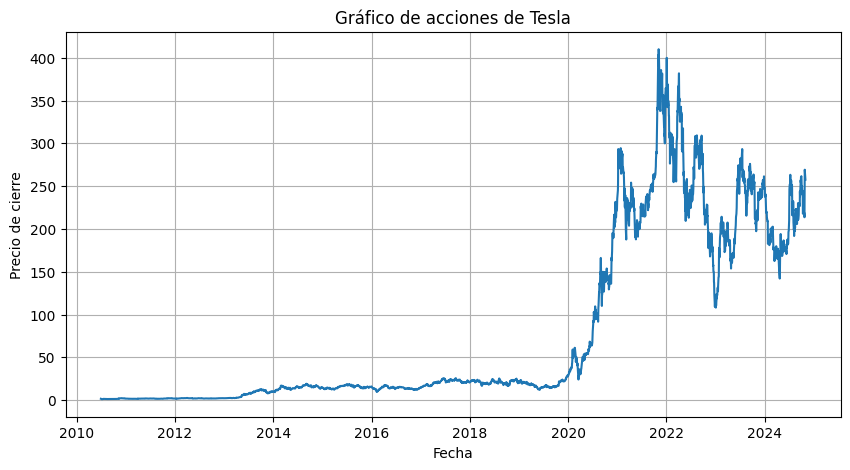

In [21]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Precio de cierre')  
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre')
    plt.grid(True)
    plt.show()
make_graph(tesla_data, "Gráfico de acciones de Tesla")


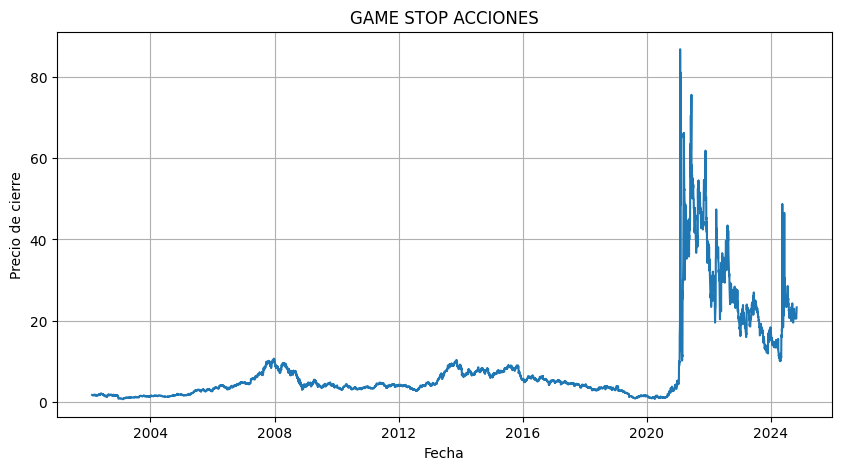

In [22]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label='Precio de cierre')  
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre')
    plt.grid(True)
    plt.show()
make_graph(GME_data, "GAME STOP ACCIONES")

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table')[1]  
dates = []
revenues = []
for row in table.find_all('tr')[1:]:  
    cols = row.find_all('td')
    if len(cols) == 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")  
        dates.append(date)
        revenues.append(revenue)
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
print(tesla_revenue)


IndexError: list index out of range

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')
if len(tables) < 2:
    print("No se pudo encontrar la tabla de ingresos. Verifica la estructura HTML de la página.")
else:
    table = tables[1]
    dates = []
    revenues = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            dates.append(date)
            revenues.append(revenue)
    gme_revenue = pd.DataFrame({
        "Date": dates,
        "Revenue": revenues})
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
    print(gme_revenue.tail())

No se pudo encontrar la tabla de ingresos. Verifica la estructura HTML de la página.
